In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Features dataset

In [18]:
df_features = pd.read_csv('./data/features.csv')
df_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [19]:
df_features.shape

(26707, 36)

## Import Labels dataset

In [20]:
df_labels = pd.read_csv('./data/labels.csv')
df_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [21]:
df_labels.shape

(26707, 3)

## Check if both labels and features have correct / related data

In [22]:
np.testing.assert_array_equal(df_labels['respondent_id'].values, 
                              df_features['respondent_id'].values)

## Add a new column 'is_vaccinated' to count how many people took h1n1 vaccine, seasonal flu vaccine and how many took both

In [23]:
def whichVaccine(row):
    if((row['h1n1_vaccine'] == 1) & (row['seasonal_vaccine'] == 0)):
        return "H1N1"
    elif ((row['seasonal_vaccine'] == 1) & (row['h1n1_vaccine'] == 0)):
        return "Seasonal"
    elif ((row['seasonal_vaccine'] == 1) & (row['h1n1_vaccine'] == 1)):
        return "H1N1 and Seasonal"
    elif ((row['seasonal_vaccine'] == 0) & (row['h1n1_vaccine'] == 0)):
        return "No Vaccine"

## Merge Features & Labels dataset using 'respondent_id'

In [24]:
df = df_features.merge(df_labels, left_on='respondent_id', right_on='respondent_id')

In [25]:
df['is_vaccinated'] = df.apply(whichVaccine, axis=1)

In [26]:
df['is_vaccinated'].value_counts()

No Vaccine           13295
Seasonal              7738
H1N1 and Seasonal     4697
H1N1                   977
Name: is_vaccinated, dtype: int64

## Set index as 'respondent_id'

In [27]:
display(df.head())

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine,is_vaccinated
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,No Vaccine
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1,Seasonal
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0,No Vaccine
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1,Seasonal
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0,No Vaccine


In [28]:
df.set_index('respondent_id', inplace=True)

## Write Merged File - features_labels.csv

In [29]:
df.to_csv('./data/features_labels.csv')

## Plot Count of people who got vaccinated

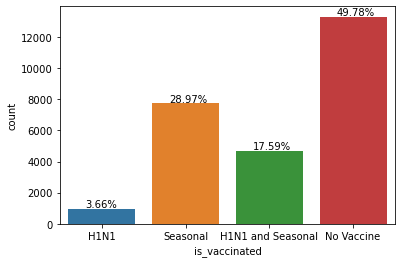

In [30]:
disp_order = ['H1N1', 'Seasonal', 'H1N1 and Seasonal', 'No Vaccine']
total = len(df_labels)
ax = sns.countplot(x="is_vaccinated", data=df, order=disp_order)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height()/total) * 100), 
                (p.get_x()+0.20, p.get_height()+100))
plt.show()

In [31]:
pd.crosstab(
    df["h1n1_vaccine"], 
    df["seasonal_vaccine"]
)

seasonal_vaccine,0,1
h1n1_vaccine,,
0,13295,7738
1,977,4697


In [32]:
correlation = df["h1n1_vaccine"].corr(df["seasonal_vaccine"])
print(correlation)

0.37714265306144507


## Inference
    - Almost 50% of the sample population didnot get vaccinated.
    - Very few percentage - Only 3.6% of sample population got only H1N1 vaccine and a total of around 18% got both H1N1 & Seasonal Flu vaccinated.

## Plot the count of people got vaccinated based on Gender

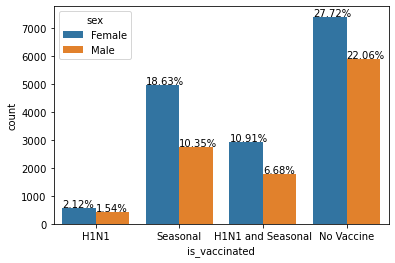

In [33]:
disp_order = ['H1N1', 'Seasonal', 'H1N1 and Seasonal', 'No Vaccine']
total = len(df_labels)
ax = sns.countplot(x="is_vaccinated", data=df, order=disp_order, 
                   hue="sex")
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height()/total) * 100), 
                (p.get_x(), p.get_height()+30))
plt.show()

## Inference
    The percentage of female population got vaccinated more than males.

## Plot count people got vaccinated based on age_group

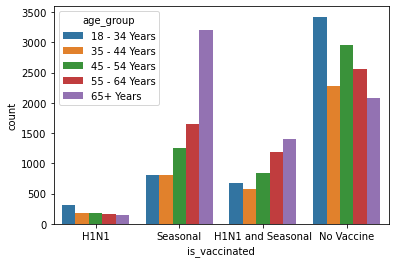

In [34]:
disp_order = ['H1N1', 'Seasonal', 'H1N1 and Seasonal', 'No Vaccine']
age_order = ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']
total = len(df_labels)
ax = sns.countplot(x="is_vaccinated", data=df, order=disp_order, 
                   hue="age_group", hue_order=age_order)
plt.show()

## Inference
    People aged 65+ got vaccinated more for seasonal & both H1N1 + Seasonal.
    More number of people, aged 18 - 34 did not get prefer to get vaccinated.

## Plot count people got vaccinated based on Doctor Recommendations

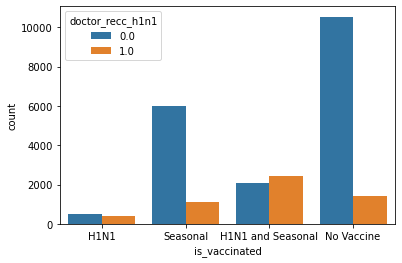

In [35]:
disp_order = ['H1N1', 'Seasonal', 'H1N1 and Seasonal', 'No Vaccine']
total = len(df_labels)
ax = sns.countplot(x="is_vaccinated", data=df, order=disp_order, 
                   hue="doctor_recc_h1n1")
plt.show()

## Plot count people got vaccinated based on concerns


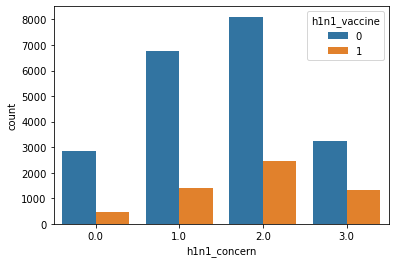

In [36]:
total = len(df_labels)
ax = sns.countplot(x="h1n1_concern", data=df, 
                   hue="h1n1_vaccine")
plt.show()

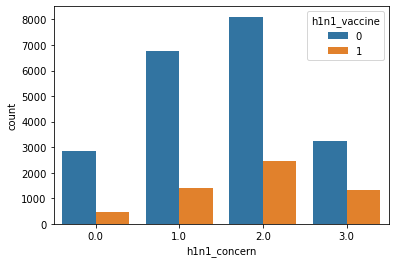

In [37]:
disp_order = ['H1N1', 'Seasonal', 'H1N1 and Seasonal', 'No Vaccine']
total = len(df_labels)
ax = sns.countplot(x="h1n1_concern", data=df, 
                   hue="h1n1_vaccine")
plt.show()